In [1]:
import numpy as np
import math 
from scipy.stats import bernoulli

In [2]:
def datagen(n = 20, d = 10, p = 0, sigma = 10):
    mean = np.zeros(d)
    I = np.identity(d)
    A = np.random.multivariate_normal(mean, I, n)
    w = np.random.multivariate_normal(mean, I, 1)
    z = bernoulli.rvs(p,size = n)
    epsilon = np.random.normal(0,sigma,n)
    b = np.zeros(n)
    for i in range(n):
        b[i] = (1-z[i])*((np.inner(A[i],w)) **2) + z[i] * abs(epsilon[i])
    return A,b,w

In [3]:
def func(A,b,w):
    n,d = A.shape
    f = 0.0
    for i in range(n):
        f += abs( (np.inner(A[i],w)) **2 - b[i]) 
    
    return f/n

In [4]:
def subgradient(A,b,w):
    n,d = A.shape
    g = np.zeros(d)
    for i in range(n):
        if (np.inner(A[i],w)**2 - b[i] > 0):
            g += 2*np.inner(A[i],w) * A[i]
        elif (np.inner(A[i],w)**2 - b[i] < 0):
            g -= 2*np.inner(A[i],w) * A[i]
        else: 
            
            interval = np.random.uniform(-1,1,size =1)
            g += interval* 2*np.inner(A[i],w) * A[i]
            
            #g += 0
    return g/n

In [5]:
def subgrad(A,b,w,w_gen,fb,tol = 1e-3, maxiter = 1000):
    f = 0.0
    error = []
    for t in range(maxiter):
        f_t = func(A,b,w)
        g = subgradient(A,b,w)
        if np.linalg.norm(g) <= tol:
            break
        w = w - (f_t - f)/np.linalg.norm(g) * (g/np.linalg.norm(g))
        
        if fb == 'ub':
            if t == 0:
                f = f_t + tol
            
            f = min(f,f_t) + tol
        
        error.append(math.log( np.linalg.norm( abs(w)- abs(w_gen)) / np.linalg.norm(w_gen)))
    return error

In [6]:
import matplotlib.pyplot as plt

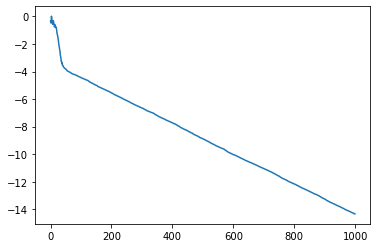

In [8]:
#2.4
A,b,w_gen = datagen(n = 20, d = 10, p = 0, sigma = 10)
w = np.random.normal(0,1,10)
error = subgrad(A,b,w,w_gen,'0', 1e-3, 1000)
t1 = list(range(0, 1000))
plt.plot(t1,error)

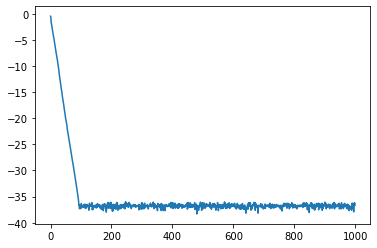

In [9]:
A,b,w_gen = datagen(n = 100, d = 10, p = 0, sigma = 10)
w = np.random.normal(0,1,10)
error = subgrad(A,b,w,w_gen,'0', 1e-3, 1000)
t1 = list(range(0, 1000))
plt.plot(t1,error)

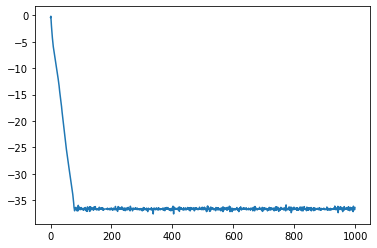

In [10]:
A,b,w_gen = datagen(n = 200, d = 10, p = 0, sigma = 10)
w = np.random.normal(0,1,10)
error = subgrad(A,b,w,w_gen,'0', 1e-3, 1000)
t1 = list(range(0, 1000))
plt.plot(t1,error)

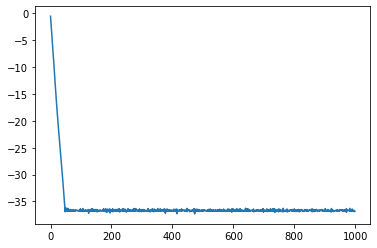

In [11]:
A,b,w_gen = datagen(n = 500, d = 10, p = 0, sigma = 10)
w = np.random.normal(0,1,10)
error = subgrad(A,b,w,w_gen,'0', 1e-3, 1000)
t1 = list(range(0, 1000))
plt.plot(t1,error)

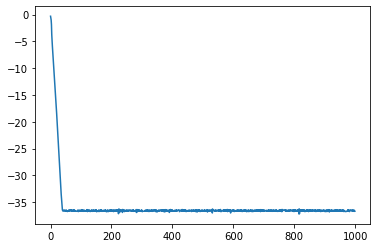

In [12]:
A,b,w_gen = datagen(n = 1000, d = 10, p = 0, sigma = 10)
w = np.random.normal(0,1,10)
error = subgrad(A,b,w,w_gen,'0', 1e-3, 1000)
t1 = list(range(0, 1000))
plt.plot(t1,error)

In [13]:
my_list = [20,100,200,500,1000]

In [21]:
def plot_list(n_list,p = 0,sigma = 10,fb = 'a'):
    for i in range(len(n_list)):
        A,b,w_gen = datagen(n_list[i], 10, p , sigma = 10)
        w = np.random.normal(0,1,10)
        error = subgrad(A,b,w,w_gen,fb, tol = 1e-3, maxiter=1000)
        t1 = list(range(0, 1000))
        plt.plot(t1,error,label=str(n_list[i]))
    plt.gca().legend(('20','100','200','500','1000'))

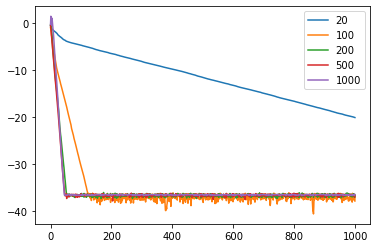

In [25]:
#2.4 
plot_list(my_list,0)

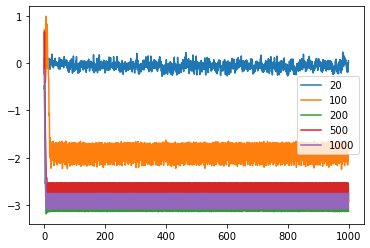

In [28]:
#2.5 with p = 0.1
plot_list(my_list,0.1)

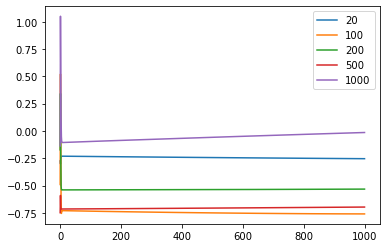

In [29]:
#2.5 with p = 0.1 and fb = 'ub'
plot_list(my_list,0.1,fb = 'ub')